# PROBLEM STATEMENT


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/04/Enlisted_Housing%2C_Fort_Belvior.jpg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. House Price Predictions
  </td></tr>
</table>






---

* Dataset includes house sale prices for King County in USA. 
* Homes that are sold in the time period: May, 2014 and May, 2015.
* Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction
* Columns:

> 1. ida: notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/House
6. sqft_living: square footage of the home
7. sqft_lot: square footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. grade: overall grade given to the housing unit, based on King County grading system
13. sqft_abovesquare: footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) 
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)




---








# STEP #0: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.9.2

import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# STEP #1: IMPORT DATASETS

In [2]:
dataset = pd.read_csv('kc_house_data.csv')

In [3]:
dataset = dataset.drop(labels=['zipcode', 'id', 'date', 'lat', 'long'], axis=1)
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


# STEP #2: VISUALIZE DATASET

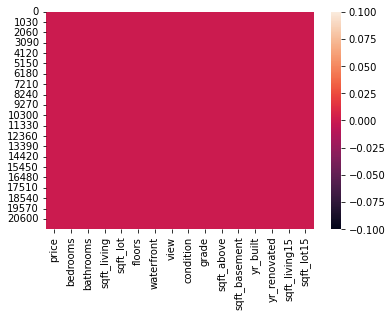

In [4]:
sns.heatmap(dataset.isnull())

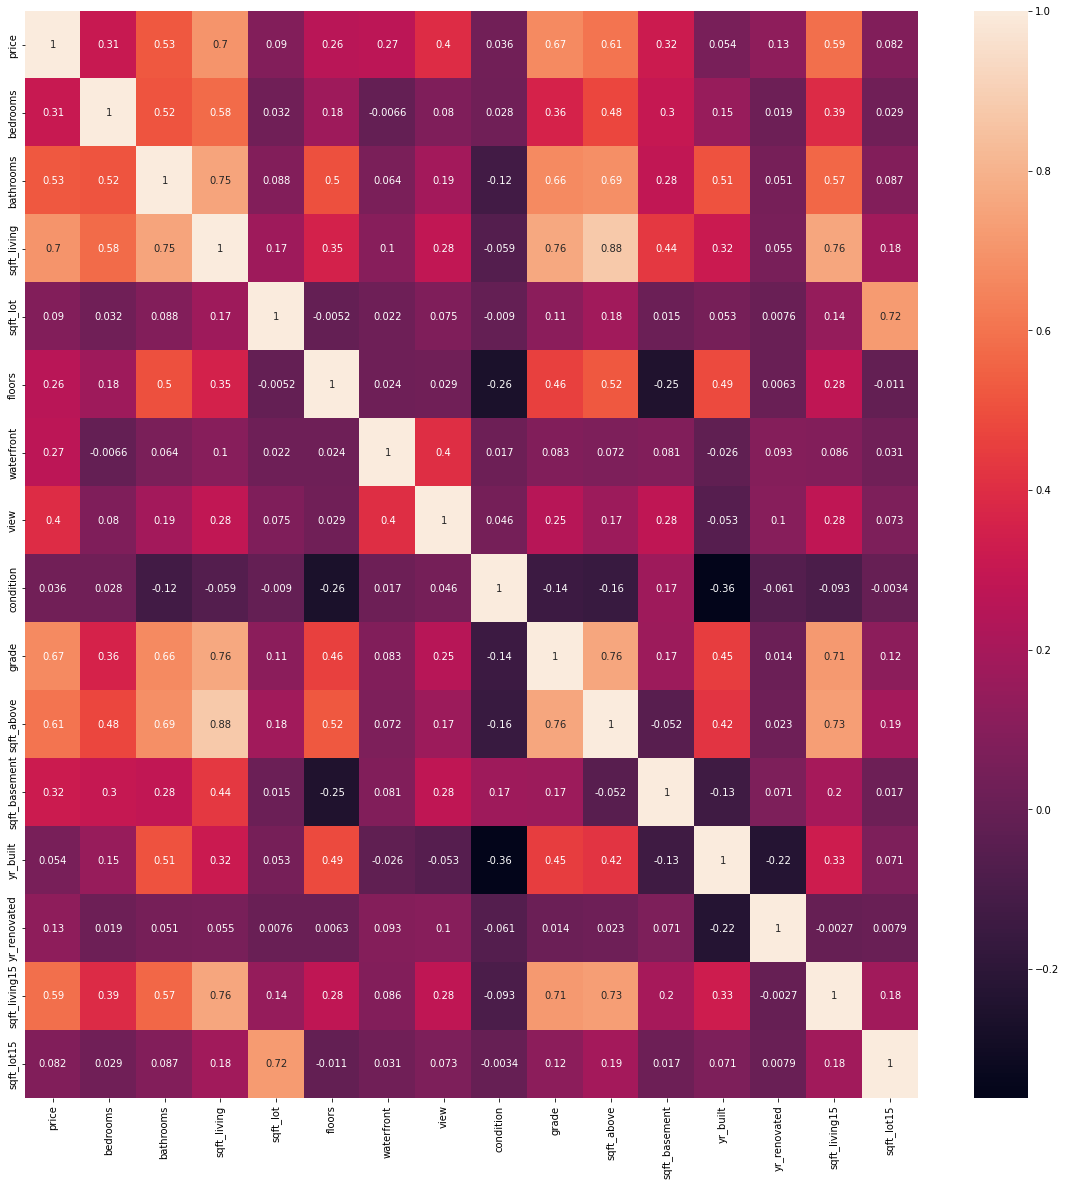

In [5]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24bec37ca0>,
      dtype=object)

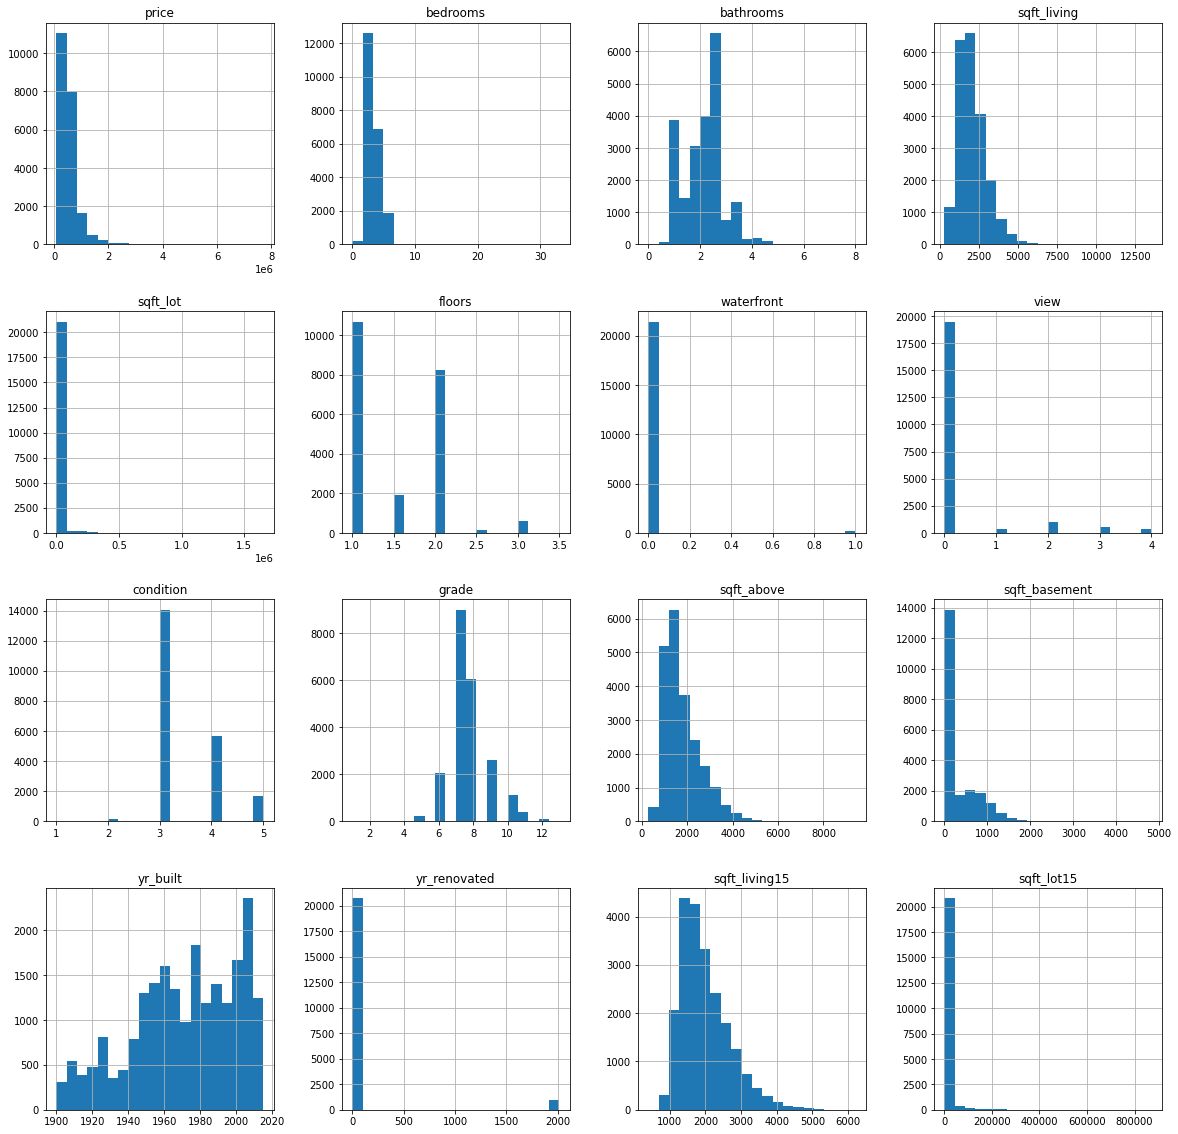

In [6]:
dataset.hist(bins=20, figsize=(20,20))

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [7]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train.shape

(16209, 15)

# STEP#4: TRAINING THE MODEL

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(15, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,901
Trainable params: 21,901
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [14]:
pred = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
406/406 [==============================] - 5s 10ms/step - loss: 126187438080.0000 - val_loss: 50023763968.0000
Epoch 2/100
406/406 [==============================] - 5s 12ms/step - loss: 55561273344.0000 - val_loss: 46103261184.0000
Epoch 3/100
406/406 [==============================] - 4s 9ms/step - loss: 49759719424.0000 - val_loss: 42105364480.0000
Epoch 4/100
406/406 [==============================] - 4s 9ms/step - loss: 46424748032.0000 - val_loss: 39633141760.0000
Epoch 5/100
406/406 [==============================] - 3s 8ms/step - loss: 44315979776.0000 - val_loss: 45177724928.0000
Epoch 6/100
406/406 [==============================] - 3s 7ms/step - loss: 43030929408.0000 - val_loss: 37994696704.0000
Epoch 7/100
406/406 [==============================] - 4s 9ms/step - loss: 41898356736.0000 - val_loss: 37435617280.0000
Epoch 8/100
406/406 [==============================] - 2s 4ms/step - loss: 40564649984.0000 - val_loss: 37292122112.0000
Epoch 9/100
406/406 [========

# STEP#5: EVALUATING THE MODEL 

In [15]:
pred.history.keys()

dict_keys(['loss', 'val_loss'])

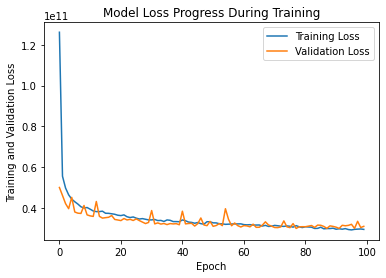

In [16]:
plt.plot(pred.history['loss'])
plt.plot(pred.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Values')

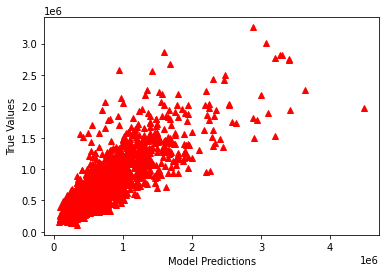

In [17]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [18]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [19]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 189662.087 
MSE = 35971707104.85549 
MAE = 126427.48223827257 
R2 = 0.704838128527532 
Adjusted R2 = 0.7040164083953704
